In [24]:
%matplotlib qt
import numpy as np
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats


#### Recall the logistic function

$y(x)=\frac{L}{1+e^{-k(x-x_0)}}$

The parameters are: 

Let's create logistic data with $L=1$, $x_0=0$ and $k=3$ with k being the only parameter, and try to fit it with the logistic function.

Let's plot the function for several values of k.

Then, lets calculate the cost function, the MSE, for several values of k and plot it.

Text(0, 0.5, 'y')

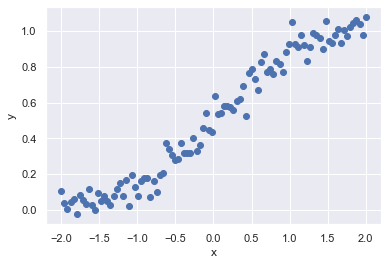

In [2]:
#First, let's create the noisy data an plot it
k=2.0
x=np.linspace(-2,2,100)
y=1.0/(1.0+np.exp(-k*x))+np.random.normal(scale=0.05,size=100)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

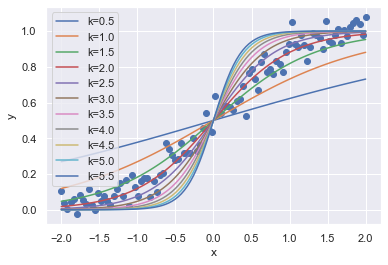

In [3]:
#Then we will plot several logistic curves for different values of k

x_fit=np.linspace(-2,2,100)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

y_fit=np.ones((100,11))
              
for i in range(11):
    k=0.5*i + 0.5 
    y_fit[:,i]=1.0/(1.0+np.exp(-k*x_fit))
    plt.plot(x_fit,y_fit[:,i],label='k='+str(k))
    
plt.legend()

Text(0, 0.5, 'CF')

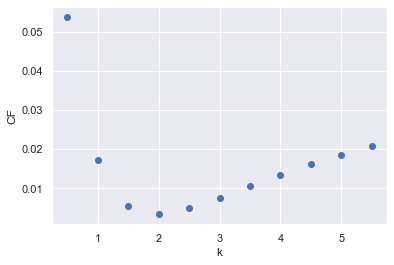

In [4]:
#Now let's plot the MSE for each k

CF=np.zeros(11)
K=np.zeros(11)

for i in range(11):
    K[i]=0.5*i + 0.5
    for j in range(100):
        CF[i]+=((y_fit[j,i]-y[j])**2)/100

plt.scatter(K,CF)
plt.xlabel('k')
plt.ylabel('CF')

#### Let's pretend that we don't know that k=2, and let's fit this data with a logistic function. 

(Let's pretend that we know that $L=1$, and $x_0=0$)

How do we fit using least squares? 

Calculate the MSE (CF):

$CF=\frac{1}{n}\sum_{i=1}^n(y_i-y_{logistic}(x_i))^2$

Get the derivative over $k$:

$\frac{dCF}{dk}=\frac{1}{n}\sum_{i=1}^n2(y_i-y_{logistic}(x_i;k))\frac{dy_{logistic}(x_i;k)}{dk}$

Recall the derivative of a logistic function:

$\frac{dy}{dk}=ky(1-y)$

So we have: 

$\frac{dCF}{dk}=\frac{1}{n}\sum_{i=1}^n2(y_i-y_{logistic}(x_i;k))ky_{logistic}(x_i;k)(1-y_{logistic}(x_i;k))$

If we replace $y_{logistic}(x_i;k)=\frac{1}{1+e^{-kx_i}}$

we will get a monstrouous expression that we need to solve for $k$! 

We can't do that! 

So how do we find $k$ that minimizes $CF$?




### The method of steepest descent. 

Instead of trying to solve the equation for the derivative of the cost function analitically:

$\frac{dCF}{dk}=0$

we can solve it numerically. 

We will do that in several steps. 

Recall that the derivative of a function in a point, is the slope of the tangent at that point. 


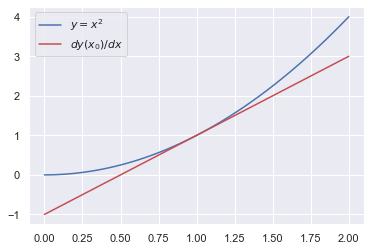

In [5]:
x=np.linspace(0,2,100)
y=x**2
x_0=1

y_prime=2*x

plt.plot(x,y, label=r'$y=x^2$')
y_tangent=2*(x-x_0)+1.0
plt.plot(x,y_tangent,color='r',label=r'$dy (x_0)/dx$')
plt.legend()

The derivative therefore points to higher values of the function. 

If we subtract the derivative from $x$, we will move towards the local minimum.

We can do that several times, until we see a convergence to the minimum. 

$x_i=x_{i-1}-\alpha \frac{dy(x_{i-1})}{dx}$

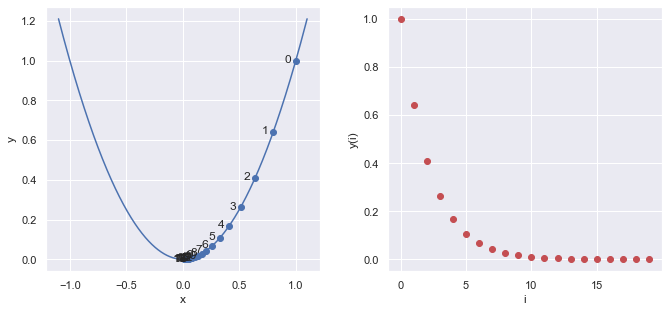

In [17]:
#let's do an example
x=np.linspace(-1.1,1.1,1000)
y=x**2

x_0=1
alpha=0.1

N=20 #number of steps

x_steps=np.zeros(N)
y_steps=np.zeros(N)

x_steps[0]=x_0
y_steps[0]=x_0**2
for i in range(1,N):
    x_steps[i]=x_steps[i-1]-alpha*2*x_steps[i-1]
    y_steps[i]=x_steps[i]**2

fig, ax=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=3.0)

ax[0].plot(x,y)
ax[0].scatter(x_steps,y_steps)

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
for i in range(N):
    ax[0].text(x_steps[i]-0.1,y_steps[i]-0.01,str(i))

#for i in range(N-1):
#    ax[0].arrow(x_steps[i],y_steps[i],x_steps[i+1]-x_steps[i],y_steps[i+1]-y_steps[i],color='r',width=0.02, head_width=0.01)

ax[1].set_xlabel('i')
ax[1].set_ylabel('y(i)')
ax[1].scatter(range(N),y_steps,color='r')


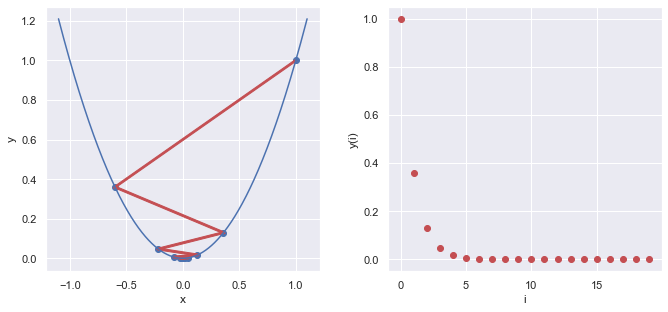

In [7]:
#What happens if alpha is very large?
#let's do an example
x=np.linspace(-1.1,1.1,1000)
y=x**2

x_0=1
alpha=0.8

N=20 #number of steps

x_steps=np.zeros(N)
y_steps=np.zeros(N)

x_steps[0]=x_0
y_steps[0]=x_0**2
for i in range(1,N):
    x_steps[i]=x_steps[i-1]-alpha*2*x_steps[i-1]
    y_steps[i]=x_steps[i]**2

fig, ax=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=3.0)

ax[0].plot(x,y)
ax[0].scatter(x_steps,y_steps)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

for i in range(N-1):
    ax[0].arrow(x_steps[i],y_steps[i],x_steps[i+1]-x_steps[i],y_steps[i+1]-y_steps[i],color='r',width=0.01, head_width=0.01)

ax[1].set_xlabel('i')
ax[1].set_ylabel('y(i)')
ax[1].scatter(range(N),y_steps,color='r')


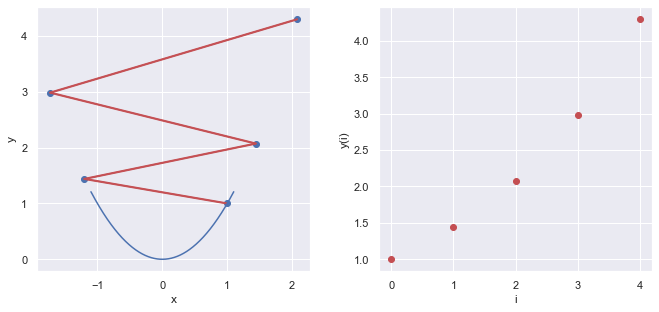

In [8]:
#Even bigger alpha
#What happens if alpha is very large?
#let's do an example
x=np.linspace(-1.1,1.1,1000)
y=x**2

x_0=1
alpha=1.1

N=5 #number of steps

x_steps=np.zeros(N)
y_steps=np.zeros(N)

x_steps[0]=x_0
y_steps[0]=x_0**2
for i in range(1,N):
    x_steps[i]=x_steps[i-1]-alpha*2*x_steps[i-1]
    y_steps[i]=x_steps[i]**2

fig, ax=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=3.0)

ax[0].plot(x,y)
ax[0].scatter(x_steps,y_steps)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

for i in range(N-1):
    ax[0].arrow(x_steps[i],y_steps[i],x_steps[i+1]-x_steps[i],y_steps[i+1]-y_steps[i],color='r',width=0.02, head_width=0.01)

ax[1].set_xlabel('i')
ax[1].set_ylabel('y(i)')
ax[1].scatter(range(N),y_steps,color='r')


### $\alpha$ is called the "Learning rate"

This is quite a general procedure in Machine learning.

You start at a point, correct toward minimizing the cost function.

Do it in several steps, with some learning rate.

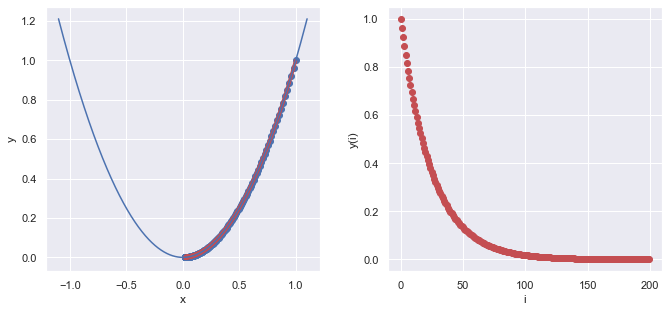

In [9]:
#What is alpha is too small?

x=np.linspace(-1.1,1.1,1000)
y=x**2

x_0=1
alpha=0.01

N=200 #number of steps

x_steps=np.zeros(N)
y_steps=np.zeros(N)

x_steps[0]=x_0
y_steps[0]=x_0**2
for i in range(1,N):
    x_steps[i]=x_steps[i-1]-alpha*2*x_steps[i-1]
    y_steps[i]=x_steps[i]**2

fig, ax=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=3.0)

ax[0].plot(x,y)
ax[0].scatter(x_steps,y_steps)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

for i in range(N-1):
    ax[0].arrow(x_steps[i],y_steps[i],x_steps[i+1]-x_steps[i],y_steps[i+1]-y_steps[i],color='r',width=0.02, head_width=0.01)

ax[1].set_xlabel('i')
ax[1].set_ylabel('y(i)')
ax[1].scatter(range(N),y_steps,color='r')


#### We are waisting time with too small $\alpha$.

We can stop the procedure when we reach a certain predefined tolerance, criterium for CF.

Say when y<0.01.

or better when two consecutive $y$s are closer than some threshold.

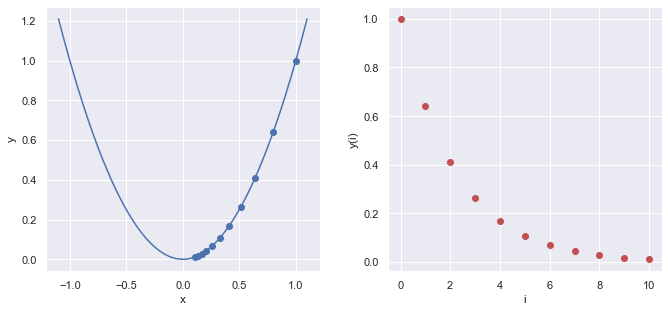

In [22]:
x=np.linspace(-1.1,1.1,1000)
y=x**2

x_0=1
alpha=0.1
tolerance=0.01

x_steps=np.zeros(N)
y_steps=np.zeros(N)

x_steps[0]=x_0
y_steps[0]=x_0**2
i=0
while abs(y_steps[i+1]-y_steps[i])>tolerance:
    i+=1
    x_steps[i]=x_steps[i-1]-alpha*2*x_steps[i-1]
    y_steps[i]=x_steps[i]**2

fig, ax=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=3.0)

ax[0].plot(x,y)
ax[0].scatter(x_steps[0:i],y_steps[0:i])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

#for i in range(N-1):
#    ax[0].arrow(x_steps[i],y_steps[i],x_steps[i+1]-x_steps[i],y_steps[i+1]-y_steps[i],color='r',width=0.02, head_width=0.01)

ax[1].set_xlabel('i')
ax[1].set_ylabel('y(i)')
ax[1].scatter(range(i),y_steps[0:i],color='r')

Typically the models have more than one parameters. 

The descent is happening in multidimensional spaces. 

If $\vec{x}$ is the vector of coordinates in a multidimensional space, $y(\vec{x})$ is a function in that space. 

In other words, $\vec{x}=\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}$

Then the gradient of $y(\vec{x})$ is defined as:

$\vec{\nabla}y(\vec{x})=\begin{pmatrix}
\frac{dy}{dx_1}\\
\frac{dy}{dx_2}
\end{pmatrix}$

Let's look at a 2D example. 

In [25]:

x1=np.linspace(-1.1,1.1,100)
x2=np.linspace(-1.1,1.1,100)
x1, x2 = np.meshgrid(x1, x2)
y=x1**2+x2**2

x1_0=1
x2_0=1
alpha=0.1
N=10

x1_steps=np.zeros(N)
x2_steps=np.zeros(N)
y_steps=np.zeros(N)

x1_steps[0]=x1_0
x2_steps[0]=x2_0
y_steps[0]=x1_0**2+x2_0**2

for i in range(1,N): 
    x1_steps[i]=x1_steps[i-1]-alpha*2*x1_steps[i-1]
    x2_steps[i]=x2_steps[i-1]-alpha*2*x2_steps[i-1]
    y_steps[i]=x1_steps[i]**2+x2_steps[i]**2

ax = plt.figure().add_subplot(projection='3d')


ax.plot_surface(x1,x2,y, alpha=0.1)

ax.scatter(x1_steps, x2_steps, y_steps+0.1, color='r')

plt.show()